In [1]:
%matplotlib inline

    
import numpy as np

np.random.seed(42) # to ensure our results exactly like the book

In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
print(iris.DESCR)
print("\n")
for i in iris:
    print(i)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
X = iris.data[:, 2:] # only focus on petal length and width
Y = iris.target
feature_names = iris.feature_names[2:]
print("given:",feature_names, 
      "\npredict whether:", iris.target_names)

given: ['petal length (cm)', 'petal width (cm)'] 
predict whether: ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


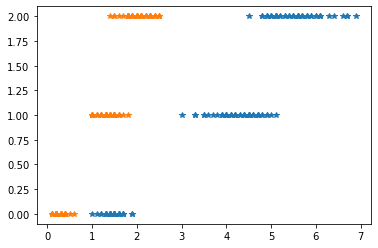

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X, Y, "*")

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
                out_file="iris_tree.dot",
                feature_names=feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

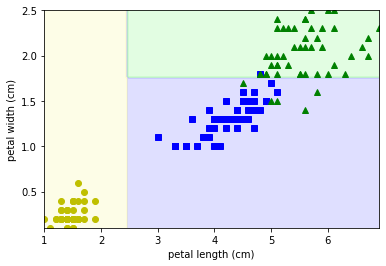

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
CUSTOM_CMAP = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
 
# helper function to plot the boundaries
def plot_decision_boundary(clf, x, y):
    color_map = ["yo", "bs", "g^"]
    for target_index, target_name in enumerate(iris.target_names):
        plt.plot(x[:, 0][y==target_index], # petal length on X axis (the ones that equal to target)
                 x[:, 1][y==target_index], # petal width on Y axis (the ones that equal to target)
                 color_map[target_index], 
                 label=target_name)
        
    x1s = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
    x2s = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_test = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_test).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=CUSTOM_CMAP)

plot_decision_boundary(tree_clf, X, Y)

plt.xlabel(feature_names[0]) # petal length (cm)
plt.ylabel(feature_names[1]) # petal width (cm)
plt.show()

In [19]:
# check np.mgrid[minX1:maxX1:increment, minX2:maxX2:increment]
X = np.mgrid[0:10:1, -5:0:1].reshape(2,-1).T
X

array([[ 0, -5],
       [ 0, -4],
       [ 0, -3],
       [ 0, -2],
       [ 0, -1],
       [ 1, -5],
       [ 1, -4],
       [ 1, -3],
       [ 1, -2],
       [ 1, -1],
       [ 2, -5],
       [ 2, -4],
       [ 2, -3],
       [ 2, -2],
       [ 2, -1],
       [ 3, -5],
       [ 3, -4],
       [ 3, -3],
       [ 3, -2],
       [ 3, -1],
       [ 4, -5],
       [ 4, -4],
       [ 4, -3],
       [ 4, -2],
       [ 4, -1],
       [ 5, -5],
       [ 5, -4],
       [ 5, -3],
       [ 5, -2],
       [ 5, -1],
       [ 6, -5],
       [ 6, -4],
       [ 6, -3],
       [ 6, -2],
       [ 6, -1],
       [ 7, -5],
       [ 7, -4],
       [ 7, -3],
       [ 7, -2],
       [ 7, -1],
       [ 8, -5],
       [ 8, -4],
       [ 8, -3],
       [ 8, -2],
       [ 8, -1],
       [ 9, -5],
       [ 9, -4],
       [ 9, -3],
       [ 9, -2],
       [ 9, -1]])

In [20]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [21]:
tree_clf.predict([[5, 1.5]])

array([1])

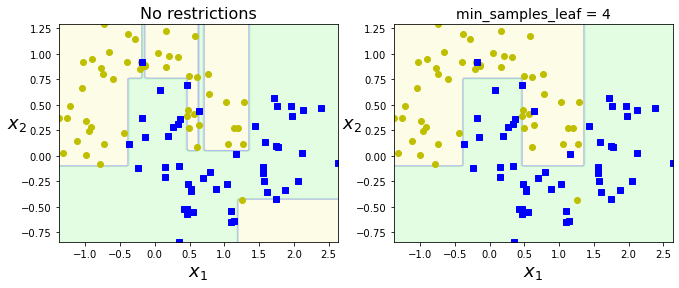

In [22]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf1, Xm, ym)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf2, Xm, ym)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)


plt.show()

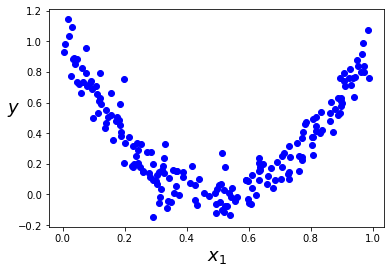

In [23]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
Y = y + np.random.randn(m, 1) / 10

plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,Y)

DecisionTreeRegressor(max_depth=2)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [26]:
from sklearn.metrics import accuracy_score
def test_clfs(*clfs): # clf -> classifier
    for clf in clfs:
        clf.fit(X_train, Y_train) # train the classifier
        Y_pred = clf.predict(X_test)
        print(clf.__class__.__name__ + ":", accuracy_score(Y_test, Y_pred))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Don't worry about the warnings, 
# sci-kit community will be fixing it in the next major version 0.20.0 
    
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), 
                                          ('rf', rnd_clf), 
                                          ('svc', svm_clf)],
                              voting='hard')
test_clfs(log_clf, rnd_clf, svm_clf, voting_clf)

LogisticRegression: 0.864
RandomForestClassifier: 0.896
SVC: 0.896
VotingClassifier: 0.912


Bagging Classifier
0.904
Decision Tree Classifier
0.856


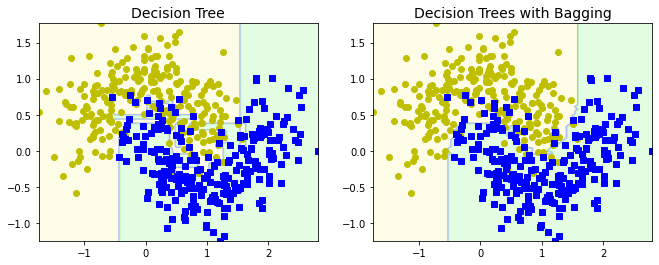

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# define our decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
# 500 copies of the predictor, which has 100 samples from training set
# n_jobs=-1 for utilizing all cores 
bag_clf = BaggingClassifier(tree_clf, 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)

# fit the bagging classifier
bag_clf.fit(X_train, Y_train)
tree_clf.fit(X_train, Y_train)

Y_pred_bag = bag_clf.predict(X_test)
Y_pred_tree = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Bagging Classifier")
print(accuracy_score(Y_test, Y_pred_bag))
print("Decision Tree Classifier")
print(accuracy_score(Y_test, Y_pred_tree))

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

Text(0, 0.5, 'Petal Width')

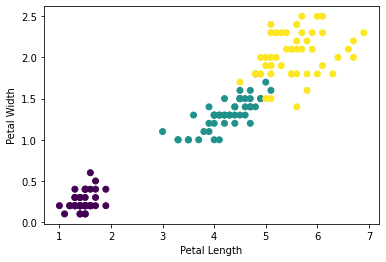

In [53]:
import matplotlib.pyplot as plt
X = iris.data[:, 2:]
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")